In [5]:
%load_ext autoreload
%autoreload 2
from torch_snippets.loader import *
from generate_image import create_image_char_by_char

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2020-06-08 15:49:39.723 | INFO     | loader:Glob:150 - 100 files found at /Users/yreddy31/Documents/data/ocr-data/fonts/hw-100/*


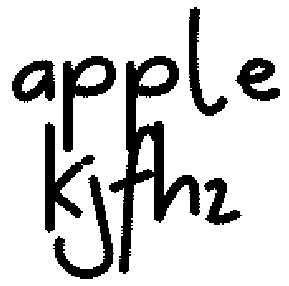

In [9]:
from augment_functions import *
from faker import Faker
aug = iaa.Sequential(
    iaa.geometric.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-5, 5),
        shear=(-2, 2), fit_output=True, cval=255)
)
fonts = Glob('/Users/yreddy31/Documents/data/ocr-data/fonts/hw-100/*')
im, bbs = create_image_char_by_char('Apple\n Kjfhz', font=choose(fonts))
show(im)

### IGNORE

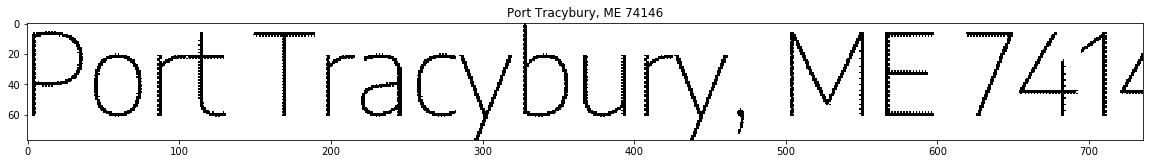

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'Port Tracybury, ME 74146')

In [3]:
mt = MakeText()

def datum(text=None, font=None):
    choices, ps = zip(*[('address',4)])
    ps = np.array(ps)
    ps = ps/sum(ps)
    _type = np.random.choice(choices, p=ps)
    text = mt(_type) if text is None else text
    text = choose(text.split('\n'))
    font = choose(fonts) if font is None else font
    im, bbs = create_image_char_by_char(text, font)
    return im, text, font

def do(text=None, font=None, aug=None, debug=False):
    im, label, font = datum(font=font, text=text, aug=aug)
    if debug: show(im, title=label, grid=True, sz=10)
    return im, label# , font
   
def do(text=None, font=None, debug=False):
    im, label, font = datum(font=font, text=text)
    if debug: show(im, title=label, grid=True)
    return im, label
do(debug=True)

In [6]:
from tqdm import trange
FOLDER = 'synthetic-MAY2-MP-address-clean'
!mkdir {FOLDER}
def mini_dump(seed):
    # ims, labels = [], []
    np.random.seed(seed)
    Faker.seed(seed)
    
    for ix in trange(5000):
        try:
            im, label = do()
            if im is None: continue
            cv2.imwrite('{}/{}@{}.png'.format(FOLDER, label.replace('/','#'), rand()), im)
        except:
            pass
    return

mkdir: cannot create directory 'synthetic-MAY2-MP-address-clean': File exists


In [7]:
from multiprocessing import Process, Queue, Pool
process_list = []
for i in range(10):
    s = np.random.randint(10000000)
    process_list.append(Process(target=mini_dump, args=(s,)))
for pro in process_list:
    pro.start()
for pro in process_list:
    pro.join()

100%|██████████| 5000/5000 [03:03<00:00, 27.28it/s]


In [8]:
Glob('synthetic-MAY2-MP-address-clean');

2020-05-02 08:49:21.299 | INFO     | ocr.loader:Glob:136 - 50020 files found at synthetic-MAY2-MP-address-clean
